auc: 0.7224509803921567
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.74      0.55      0.63        51

    accuracy                           0.78       151
   macro avg       0.77      0.72      0.74       151
weighted avg       0.78      0.78      0.77       151



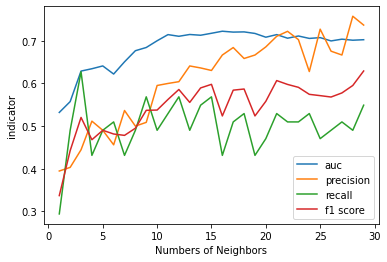

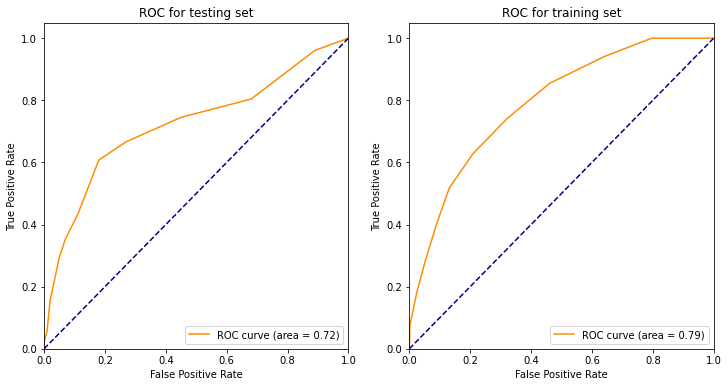

auc: 0.7901764559171967
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.74      0.55      0.63        51

    accuracy                           0.78       151
   macro avg       0.77      0.72      0.74       151
weighted avg       0.78      0.78      0.77       151



In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import time

class knn:
    def __init__(self,k):
        assert 1<=k
        self.k = k
        self.X = None
        self.y = None
    
    def fit(self,train_X,train_y):
        self.X = train_X
        self.y = train_y
        
    def predict(self,test_X):
        n = test_X.shape[0]
        result = np.ones(n)
        for i in range(n):
            new_X = test_X.iloc[i,:]
            nn = (np.argsort(((self.X - new_X)**2).sum(1)))[:self.k]
            result[i] = self.y.iloc[nn,].mean()
        return result
        
        
#%% Read the data
# train = pd.read_csv("..\\bankruptcy data\\adj_imp_train.csv")
# test = pd.read_csv("..\\bankruptcy data\\adj_imp_test.csv")
# train = pd.read_csv("..\\bankruptcy data\\training_knn.csv",index_col=0)
# test = pd.read_csv("..\\bankruptcy data\\testing_knn.csv",index_col=0)
# train = pd.read_csv("..\\bankruptcy data\\smote_train.csv")
# test = pd.read_csv("..\\bankruptcy data\\adj_imp_test.csv")

train = pd.read_csv("../data/pca_train.csv")
test = pd.read_csv("../data/pca_test.csv")

train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

#%% Change the hyperparameter

auc_list=[] 
precision_list=[]
recall_list=[]
f1score_list=[]
for i in range(1,30): 
    model=knn(k=i)
    model.fit(train_X,train_y)
    score=model.predict(test_X)
    predict = score >= 0.33
    auc=roc_auc_score(test_y, score)
    precision = precision_score(test_y, predict)
    recall = recall_score(test_y,predict)
    f1score = f1_score(test_y,predict)
    auc_list.append(auc)
    precision_list.append(precision)
    recall_list.append(recall)
    f1score_list.append(f1score)


plt.plot(range(1,30),auc_list,label="auc")
plt.plot(range(1,30),precision_list,label="precision")
plt.plot(range(1,30),recall_list,label="recall")
plt.plot(range(1,30),f1score_list,label="f1 score")
plt.legend()
plt.xlabel('Numbers of Neighbors')
plt.ylabel('indicator')

#%% Model report test set
tic = time.time()
model = knn(k=16)
# model = knn(k=12)
model.fit(train_X,train_y)

score = model.predict(test_X)
toc = time.time()
auc = roc_auc_score(test_y, score)


fpr, tpr, _ = roc_curve(test_y, score)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for testing set')
plt.legend(loc="lower right")


print("auc:", auc)

print(classification_report(test_y, predict>0.3))

#%% Model report train set
model = knn(k=16)
# model = knn(k=12)
model.fit(train_X,train_y)

score = model.predict(train_X)

auc = roc_auc_score(train_y, score)

fpr, tpr, _ = roc_curve(train_y, score)

plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for training set')
plt.legend(loc="lower right")
plt.show()


print("auc:", auc)

print(classification_report(test_y, predict>0.33))